## Customer Spend Project

**Customer spend project is a detailed analysis of a imaginative store's ideal customers. It helps a business to better understand its customer's spending. The owner of a store gets information about it's Customers through membership cards.** [Data source: kaggle](https://www.kaggle.comdatasetsdatascientistannacustomers-dataset)

#### The project seeks to answer the following questions from the store's data:

1. Which gender visited the store most and actually spent?
2. Which age group spends more money in the shop?
3. Are Store customers more of small or larger families?
4. What class of profession spends more in the store?

In [476]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# # exporting html
# import plotly.io as pio
# pio.renderers.default ='notebook'

# # exporting PDF
# !pip install pyppeteer
# !pyppeteer-install

In [60]:
#importing data set
cust = pd.read_csv(r"C:\Users\MR FEM\Desktop\Data Analytics\iPractise\possible projects - downloaded\Shop Customer Data\Customers _proj.csv")
cust.head(2)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3


### Exploratory Data Analysis of customer dataframe

In [61]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [62]:
cust.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

In [63]:
#Renaming columns for uniformity
cust.rename(columns = {'Annual Income ($)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score', 
                  'Work Experience':'Work_Experience', 'Family Size': 'Family_Size'}, inplace = True)
cust.head(2)

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work_Experience,Family_Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3


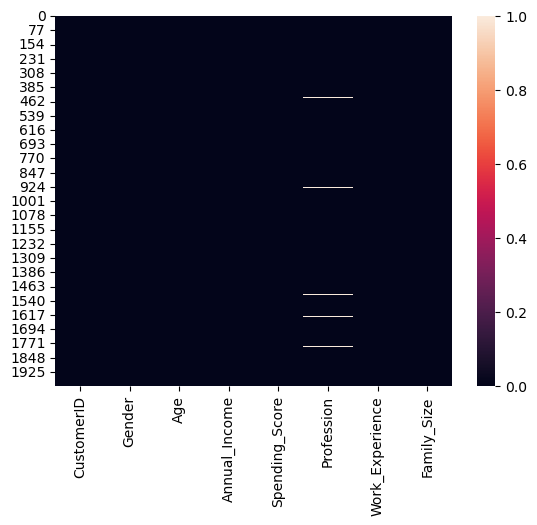

In [64]:
#identifying null via heatmap
sns.heatmap(cust.isnull())
plt.show()

### Q1. Which gender visited the store most and actually spent?

In [253]:
# cust.head(2)
custGender = cust.groupby(['Gender'])['Spending_Score'].count()
custGender

Gender
Female    1186
Male       814
Name: Spending_Score, dtype: int64

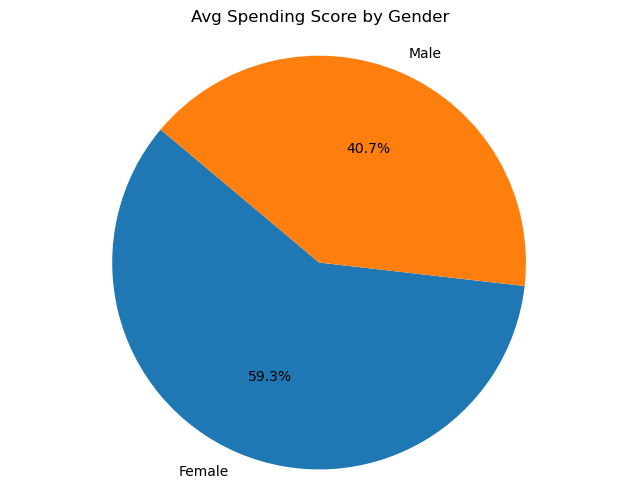

In [200]:
plt.figure(figsize=(8, 6))
plt.pie(custGender, labels=custGender.index, autopct='%1.1f%%', startangle=140)
plt.title('Avg Spending Score by Gender')
plt.axis('equal')
plt.show()

#### Answer 1: 59.3% of the women spent more money than the male shoppers

### Q2. Which  age group spends more money in the shop?

In [259]:
#identifying the maximum and minimum age in the data frame.
# cust.head(2)
min_age = cust['Age'].min()
max_age = cust['Age'].max()
print('minimum age:', min_age)
print('maximum age:', max_age)

minimum age: 0
maximum age: 99


In [92]:
#classifying age into 4 categories namely: Young, Adult, Senior and Veteran
def AgeCat(Age):
    if Age <= 25:
        return "Young"
    elif Age <=50:
        return "Adult"
    elif Age <= 75:
        return "Senior"
    else:
        return "Veteran"

In [295]:
#Adding the Age_Category column into the original data frame
# cust.head(2)
cust['Age_Category'] = cust['Age'].apply(AgeCat)
cust

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work_Experience,Family_Size,Age_Category
0,1,Male,19,15000,39,Healthcare,1,4,Young
1,2,Male,21,35000,81,Engineer,3,3,Young
2,3,Female,20,86000,6,Engineer,1,1,Young
3,4,Female,23,59000,77,Lawyer,0,2,Young
4,5,Female,31,38000,40,Entertainment,2,6,Adult
...,...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7,Senior
1996,1997,Female,91,73158,32,Doctor,7,7,Veteran
1997,1998,Male,87,90961,14,Healthcare,9,2,Veteran
1998,1999,Male,77,182109,4,Executive,7,2,Veteran


In [158]:
#dropping a column AgeCategory
cust.head(1)
# cust.drop(['AgeCategory'], axis = 1, inplace = True).reset

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work_Experience,Family_Size,Age_Category
0,1,Male,19,15000,39,Healthcare,1,4,Young


In [413]:
# cust.head(2)
# CustAge = cust.groupby(['Age_Category'])['Age_Category', 'Spending_Score'].sum()
# CustAge

cust.groupby(['Age_Category'])['Age_Category','Spending_Score'].sum()
CustAge=CustAge.sort_values(by = ['Spending_Score'], ascending = True)
CustAge

C:\Users\MR FEM\AppData\Local\Temp\ipykernel_3448\3001180648.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cust.groupby(['Age_Category'])['Age_Category','Spending_Score'].sum()


,Spending_Score
Age_Category,
Veteran,23275
Senior,24786
Adult,26216
Young,27648


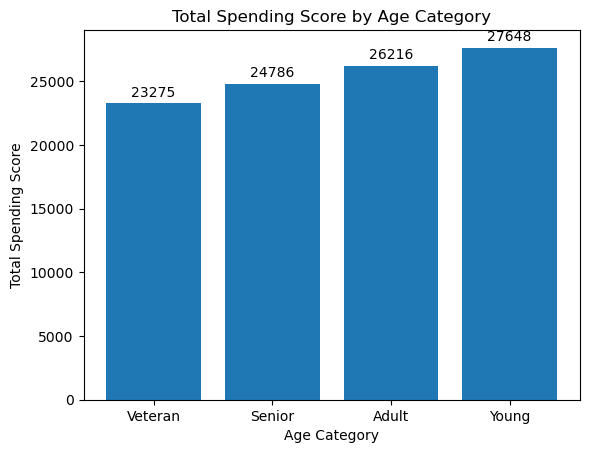

In [465]:
# visualizing Total spending score by Age  category

for i, score in enumerate(CustAge['Spending_Score']):
    plt.annotate(f'{score}', (CustAge.index[i], score), textcoords="offset points", xytext=(0, 5), ha='center')

plt.bar(CustAge.index, CustAge['Spending_Score'])
plt.xlabel('Age Category')
plt.ylabel('Total Spending Score')
plt.title('Total Spending Score by Age Category')
plt.xticks(rotation=0)
plt.show()

#### Answer 2: Young people under the age of 25 shopped more at the store

### Q3. Are Store customers more of small or larger families?

In [268]:
#identifying max & min family size
min_fam = cust['Family_Size'].min()
max_fam = cust['Family_Size'].max()
print('minimum fam_size:', min_fam)
print('maximum fam_size:', max_fam)

minimum fam_size: 1
maximum fam_size: 9


In [460]:
#classifying Family size into 3 categories namely: Small Family, Medium Family and Large Family
# def FamSizeCat(Family_Size):
#     if Family_Size == 1:
#         return "Individual"
#     elif Family_Size == 2:
#         return "Couple"
#     elif Family_Size <= 5:
#         return "Small Size Family"
#     elif Family_Size <= 7:
#         return "Medium Size Family"
#     else:
#         return "Large Family"

def FamSizeCat(Family_Size):
    if Family_Size <= 5:
        return "Small Size Family"
    elif Family_Size <= 7:
        return "Medium Size Family"
    else:
        return "Large Family"

In [461]:
#Adding the fam_Category column into the original data frame
# cust.head(2)
cust['Fam_Category'] = cust['Family_Size'].apply(FamSizeCat)
cust.head(2)

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work_Experience,Family_Size,Age_Category,Fam_Category
0,1,Male,19,15000,39,Healthcare,1,4,Young,Small Size Family
1,2,Male,21,35000,81,Engineer,3,3,Young,Small Size Family


In [467]:
CustFam = cust.groupby(['Fam_Category'])['Spending_Score'].mean()
CustFam
# CustFam2=CustFam.sort_values( by = ['Fam_Category']), ascending = True)

Fam_Category
Large Family          42.800000
Medium Size Family    49.966457
Small Size Family     51.302372
Name: Spending_Score, dtype: float64

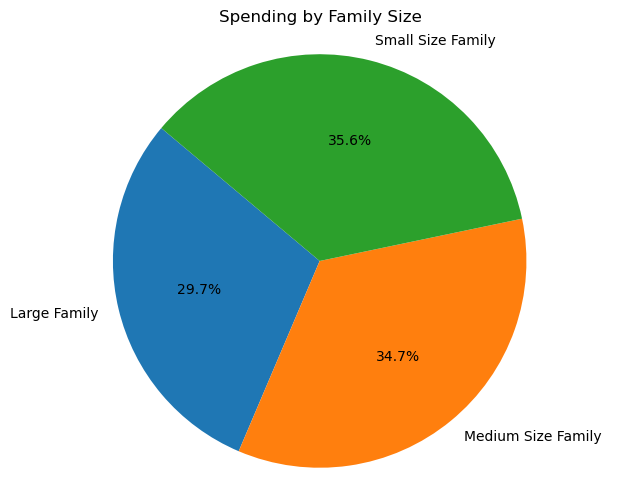

In [463]:
# CustFam.head(2)
# visualizing Total spending score by family size

plt.figure(figsize = (8, 6))
plt.pie(CustFam, labels = CustFam.index, autopct='%1.1f%%', startangle=140)
plt.title('Spending by Family Size')
plt.axis('equal')
plt.show()

#### Answer 3: Families less than 5 purchased more at the store

### Q4. What class of profession spends more in the store?

In [447]:
# cust.head(2)
cust.groupby(['Profession']).agg({'Annual_Income':'mean', 'Spending_Score':'sum'}).round(1)
CustProf = cust_prof.sort_values(by = ['Spending_Score'], ascending = True)
CustProf

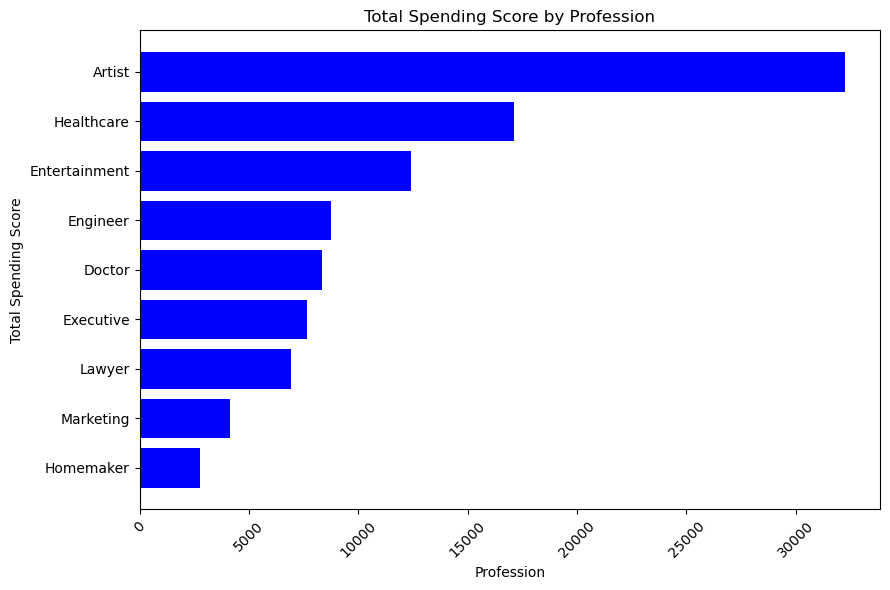

In [475]:
# visualizing Total spending score by profession
# for i, score in enumerate(CustProf['Spending_Score']):
#     plt.annotate(f'{score}', (CustProf.index[i], score), textcoords="offset points", xytext=(0, 5), ha='center')
    
plt.figure(figsize=(9, 6))
plt.barh(CustProf.index, CustProf['Spending_Score'], color='blue')
plt.xlabel('Profession')
plt.ylabel('Total Spending Score')
plt.title('Total Spending Score by Profession')
plt.xticks(rotation=45)
plt.tight_layout()


***Answer: Artist spent more in the store. Possible increased investment in Art releated stocks.***

###### Prepared by: Femi Komolafe